**Column Details:**
- **total_bill**: The total cost of the meal, including tax.  
- **tip**: The amount of tip given by the customer.  
- **sex**: The gender of the customer (Male/Female).  
- **smoker**: Indicates whether the customer is a smoker (Yes/No).  
- **day**: The day of the week when the meal was served.  
- **time**: The time of the meal (Lunch/Dinner).  
- **size**: The number of people in the dining party.  

In [14]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/content/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [8]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

* We have 224 tuples and 7 attributes.
* Above are the names of the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


We have 3 categorical columns and 3 numerical columns.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**EDA**

In [7]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


* Luckily no null values.
* We also don't appears to have any unecessry columns.

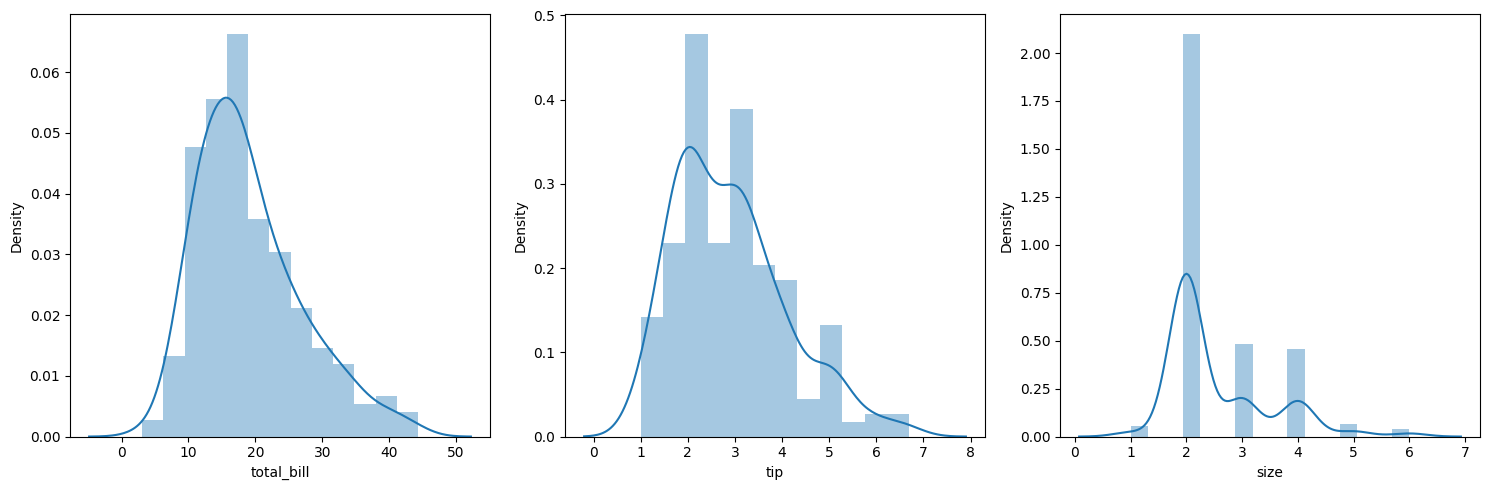

In [31]:
#Let's check the distribution of numerical columns using distplot
plt.figure(figsize=(15, 5))
index = 0
for col in ['total_bill', 'tip', 'size']:
    index += 1
    plt.subplot(1, 3, index)
    sns.distplot(df[col])
    plt.tight_layout()
plt.show()

We can infer a few things from this:
* total_bill mostly lies around $20

* Most tips given is around $2 - $4
* Most people visit as a duo.

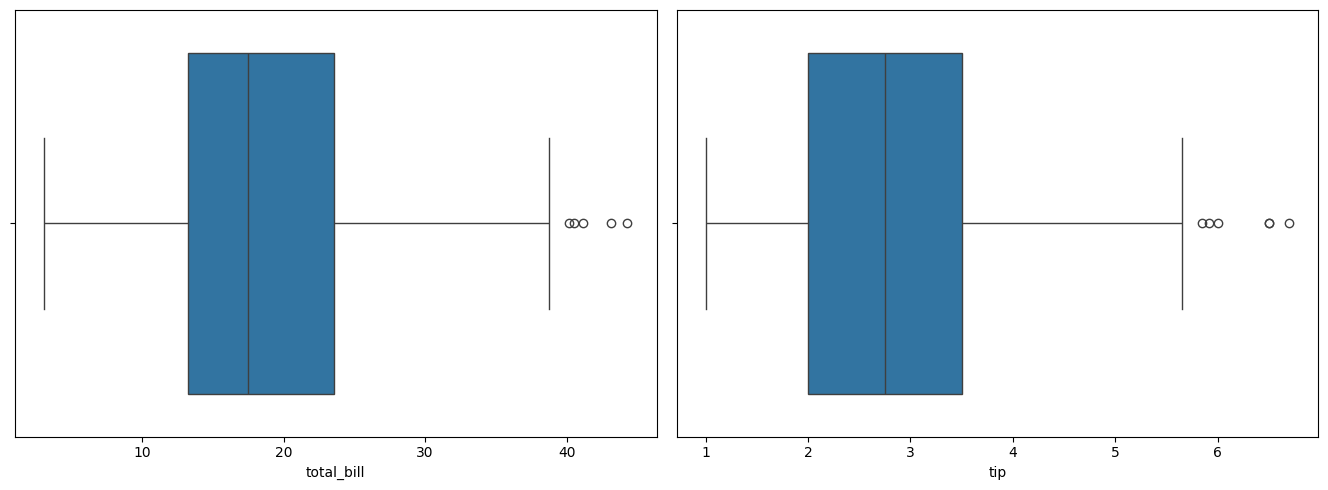

In [26]:
# Let's detect if there are any outliers
plt.figure(figsize=(20, 5))
index = 0
for col in ['total_bill', 'tip']:
    index += 1
    plt.subplot(1, 3, index)
    sns.boxplot(x=df[col])
    plt.tight_layout()
plt.show()

In [22]:
# Let's check the size if we remove the outliers
df.shape, df[(df['total_bill']<45) & (df['tip']<7)].shape

((244, 7), (238, 7))

We are losing only 6 tuples and getting rid of almost all of the outliers so let's do it.

In [24]:
df = df[(df['total_bill']<45) & (df['tip']<7)]

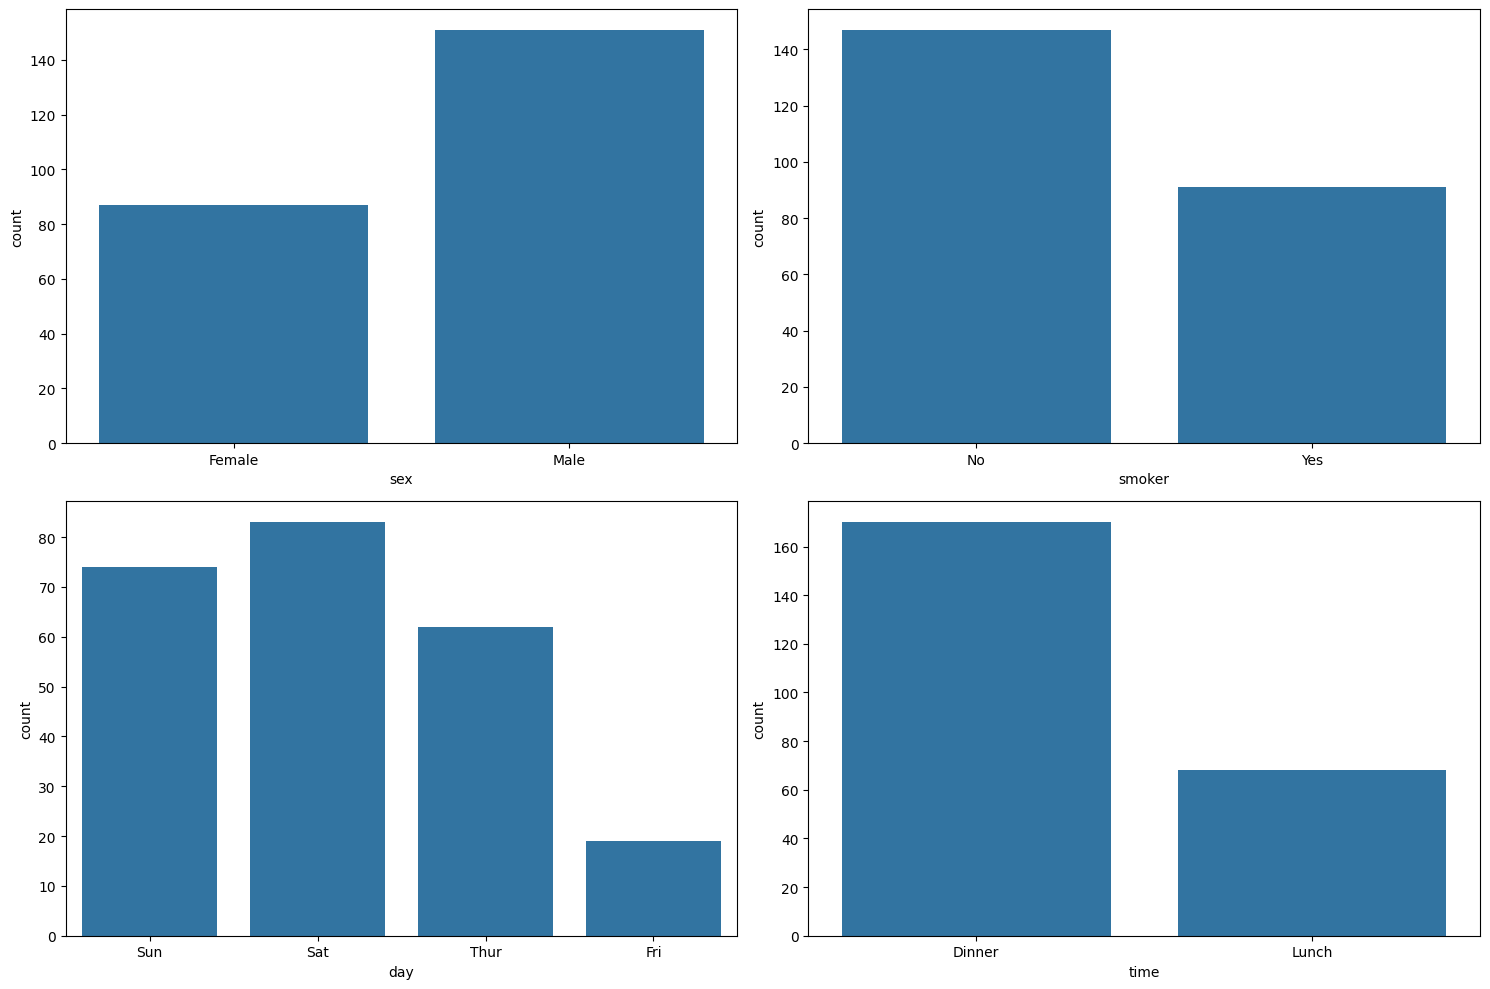

In [33]:
# Let's draw a count plot of all the categorical columns
obj_cols = ['sex','smoker','day','time']

plt.figure(figsize=(15,10))
index = 0
for col in obj_cols:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col])
    plt.tight_layout()
plt.show()

* Custmers on weekends is more than that on weekdays
* People usually prefer dinner outside as compared to lunch.
* Most of the customers are non smokers

AttributeError: PathCollection.set() got an unexpected keyword argument 'hue'

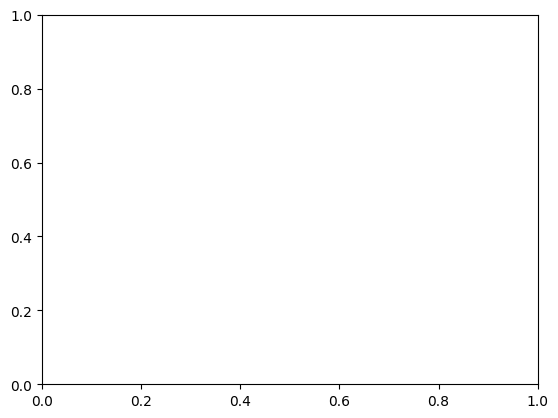

In [38]:
plt.scatter(df['total_bill'],df['tip'], color='orange')
# plt.scatter(df['tip'], color='green')
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

In [15]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')